Name: Yeo Chee En Luke </br>
Student Number:  46746267, S4674626 </br>
DATA2001 Assignment 2 :Insight </br> 

# 1) Data Preparation

## - AMAZON STOCK

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
#Read the dataset provided, set the index as the Date
data = pd.read_csv(filepath_or_buffer ="amzn.us.csv", index_col="Date")

data

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
1997-05-16,1.97,1.98,1.71,1.73,14700000,0
1997-05-19,1.76,1.77,1.62,1.71,6106800,0
1997-05-20,1.73,1.75,1.64,1.64,5467200,0
1997-05-21,1.64,1.65,1.38,1.43,18853200,0
1997-05-22,1.44,1.45,1.31,1.40,11776800,0
...,...,...,...,...,...,...
2017-11-06,1109.15,1125.41,1108.77,1120.66,3331738,0
2017-11-07,1124.74,1130.60,1117.50,1123.17,2684443,0
2017-11-08,1122.82,1135.54,1119.11,1132.88,2576010,0


## Trying to change the dataset frequency

In [3]:
#Read the dataset provided, set the index as the Date
data_trail = pd.read_csv(filepath_or_buffer ="amzn.us.csv", index_col="Date")
data_trail.index = pd.date_range('1997-05-16',periods = len(data_trail), freq = 'B')


In [4]:
data_trail.index

DatetimeIndex(['1997-05-16', '1997-05-19', '1997-05-20', '1997-05-21',
               '1997-05-22', '1997-05-23', '1997-05-26', '1997-05-27',
               '1997-05-28', '1997-05-29',
               ...
               '2017-02-01', '2017-02-02', '2017-02-03', '2017-02-06',
               '2017-02-07', '2017-02-08', '2017-02-09', '2017-02-10',
               '2017-02-13', '2017-02-14'],
              dtype='datetime64[ns]', length=5153, freq='B')

### Observation when freq in original data

When setting the frequency to B in the original data, the Length of the date is correct at 5153 and frequency at 'B'. However, the date ending is at : '2017-02-14' which is not the same ending date as our original amazon dataset <br>

Hence, i will only set the frequency at Task 3 when splitting the dataset 

## Column description

**Date**: Date of trades </br>
**Open**: Opening price, price of first trade of the day <br>
**High**: Highest price of all trades of the day </br>
**Low**: Lowest price of all trades of the day </br>
**Close**: Closing price, price of last trade before the end of day </br>
**Volume**: Total number of stocks traded during the day </br>
**OpenInt**: Open interest, the total number of outstanding derivative contracts, such as options or futures, that have not been settled for an asset at the end of day

In [5]:
data.shape

(5153, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5153 entries, 1997-05-16 to 2017-11-10
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Open     5153 non-null   float64
 1   High     5153 non-null   float64
 2   Low      5153 non-null   float64
 3   Close    5153 non-null   float64
 4   Volume   5153 non-null   int64  
 5   OpenInt  5153 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 281.8+ KB


In [7]:
#Checking missing data
data.isna().sum()

Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64

In [8]:
#Checking for duplication
data.duplicated().sum()

0

In [9]:
data.index

Index(['1997-05-16', '1997-05-19', '1997-05-20', '1997-05-21', '1997-05-22',
       '1997-05-23', '1997-05-27', '1997-05-28', '1997-05-29', '1997-05-30',
       ...
       '2017-10-30', '2017-10-31', '2017-11-01', '2017-11-02', '2017-11-03',
       '2017-11-06', '2017-11-07', '2017-11-08', '2017-11-09', '2017-11-10'],
      dtype='object', name='Date', length=5153)

In [10]:
#DailyDiff - the differece in the highest price and lowest price of the day
data['DailyDiff'] = data['High'] - data['Low']

In [11]:
data['DailyDiff']

Date
1997-05-16     0.27
1997-05-19     0.15
1997-05-20     0.11
1997-05-21     0.27
1997-05-22     0.14
              ...  
2017-11-06    16.64
2017-11-07    13.10
2017-11-08    16.43
2017-11-09    13.85
2017-11-10     7.69
Name: DailyDiff, Length: 5153, dtype: float64

## - APPLE STOCK

In [12]:
df = pd.read_csv(filepath_or_buffer ="AAPL.csv", index_col="Date")
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9909 entries, 1980-12-12 to 2020-04-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       9909 non-null   float64
 1   High       9909 non-null   float64
 2   Low        9909 non-null   float64
 3   Close      9909 non-null   float64
 4   Adj Close  9909 non-null   float64
 5   Volume     9909 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 541.9+ KB


In [14]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [16]:
df['DailyDiffApple'] = df['High'] - df['Low']

In [17]:
df['DailyDiffApple']

Date
1980-12-12     0.002232
1980-12-15     0.002232
1980-12-16     0.002232
1980-12-17     0.002232
1980-12-18     0.002232
                ...    
2020-03-26    12.319992
2020-03-27     8.819992
2020-03-30     6.120010
2020-03-31    10.489990
2020-04-01     9.589996
Name: DailyDiffApple, Length: 9909, dtype: float64

In [18]:
df = df.rename(columns = {'Open':'OpenApple', 'High': 'HighApple', 'Low':'LowApple','Close':'CloseApple','Volume':'VolumeApple'})
df.drop('Adj Close', inplace=True ,axis=1)
df.head()

,OpenApple,HighApple,LowApple,CloseApple,VolumeApple,DailyDiffApple
Date,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,117258400,0.002232
1980-12-15,0.488839,0.488839,0.486607,0.486607,43971200,0.002232
1980-12-16,0.453125,0.453125,0.450893,0.450893,26432000,0.002232
1980-12-17,0.462054,0.464286,0.462054,0.462054,21610400,0.002232
1980-12-18,0.475446,0.477679,0.475446,0.475446,18362400,0.002232


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9909 entries, 1980-12-12 to 2020-04-01
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OpenApple       9909 non-null   float64
 1   HighApple       9909 non-null   float64
 2   LowApple        9909 non-null   float64
 3   CloseApple      9909 non-null   float64
 4   VolumeApple     9909 non-null   int64  
 5   DailyDiffApple  9909 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 799.9+ KB


In [20]:
df.isna().sum()

OpenApple         0
HighApple         0
LowApple          0
CloseApple        0
VolumeApple       0
DailyDiffApple    0
dtype: int64

In [21]:
# perform inner join between amazon dataset and apple dataset, using date as the key
stock_data = pd.merge(left=data, right=df,
                        how='inner', on='Date')

stock_data.index = stock_data.index.astype('datetime64[ns]')

# print first few rows of joined table
stock_data.head()

,Open,High,Low,Close,Volume,OpenInt,DailyDiff,OpenApple,HighApple,LowApple,CloseApple,VolumeApple,DailyDiffApple
Date,,,,,,,,,,,,,
1997-05-16,1.97,1.98,1.71,1.73,14700000,0,0.27,0.625000,0.629464,0.616071,0.616071,23324000,0.013393
1997-05-19,1.76,1.77,1.62,1.71,6106800,0,0.15,0.625000,0.629464,0.607143,0.607143,13064800,0.022321
1997-05-20,1.73,1.75,1.64,1.64,5467200,0,0.11,0.607143,0.622768,0.598214,0.616071,21207200,0.024554
1997-05-21,1.64,1.65,1.38,1.43,18853200,0,0.27,0.611607,0.611607,0.589286,0.602679,30562000,0.022321
1997-05-22,1.44,1.45,1.31,1.40,11776800,0,0.14,0.598214,0.602679,0.589286,0.593750,19191200,0.013393


In [22]:
stock_data.index

DatetimeIndex(['1997-05-16', '1997-05-19', '1997-05-20', '1997-05-21',
               '1997-05-22', '1997-05-23', '1997-05-27', '1997-05-28',
               '1997-05-29', '1997-05-30',
               ...
               '2017-10-30', '2017-10-31', '2017-11-01', '2017-11-02',
               '2017-11-03', '2017-11-06', '2017-11-07', '2017-11-08',
               '2017-11-09', '2017-11-10'],
              dtype='datetime64[ns]', name='Date', length=5153, freq=None)

## **Identify useful exogenous variables** 

Useful Exogenous Variable that can be Identified: High - low = difference of the day . 
This information can be use to see the performance of the market on a daily basis, if amazon stock is doing well or did it dropped on specific days (maybe for an reason like: Amazon announcing a collaboration or new products) 

## **Explain how you did it along with a justification for your choices.**


I have picked apple stock as my external/second dataset due it having a high number of product that come out every few years. With the high number of product (old or new), there are a large number of accessories or reselling/buying of Apple products on amazon. <br>

Hence there may have an interesting relation in regards to stock in regards to the 2 companies. 



Steps I took to merge: 
1) Download and upload the dataset of both companies from :<br>
https://www.kaggle.com/datasets/borismarjanovic/price-volume-data-for-all-us-stocks-etfs <br>
https://www.kaggle.com/datasets/varpit94/apple-stock-data-updated-till-22jun2021 (Apple stock data)<br>
2) Change the for columns name in Apple stock to ensure no misunderstanding of in terms of columns for each companies <br>
3) Drop un-needed column for apple : Adj Close 
4) Merge both data base on the index column , Date 

# 2) Exploratory Data Analysis (EDA)

## Amazon Data Time Series for Volume (will take time to load the graphs)

In [23]:
stock_data['month']= stock_data.index.month_name()
stock_data['weekday'] = stock_data.index.weekday
stock_data['day_of_week']  = stock_data.index.day_name()

In [24]:
!pip install seaborn
import seaborn as sns

Defaulting to user installation because normal site-packages is not writeable
--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/usr/local/lib/python3.9/dist-packages/pip/_vendor/rich/console.py", line 1752, in print
    extend(render(renderable, render_options))
  File "/usr/local/lib/python3.9/dist-packages/pip/_vendor/rich/console.py", line 1390, in render
    for render_output in iter_render:
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/usr/local/lib/python3.9/dist-packages/pip/_vendor/rich/segment.py", line 245, in split_lines
    for segment in segments:
  File "/usr/local/lib/python3.9/dist-packages/pip/_vendor/rich/console.py", line 1368, in render
    renderable = rich_cast(renderable)
  File 

Text(0.5, 0, 'Date')

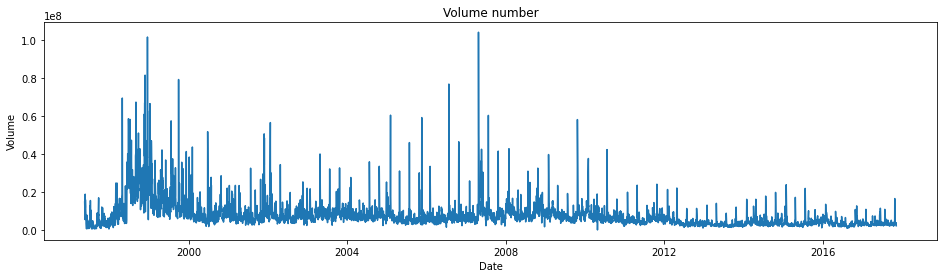

In [25]:
plt.figure(figsize=(16,4))
plt.plot(stock_data['Volume'])
plt.title('Volume number')
plt.ylabel('Volume')
plt.xlabel('Date')

Text(0, 0.5, 'Volume')

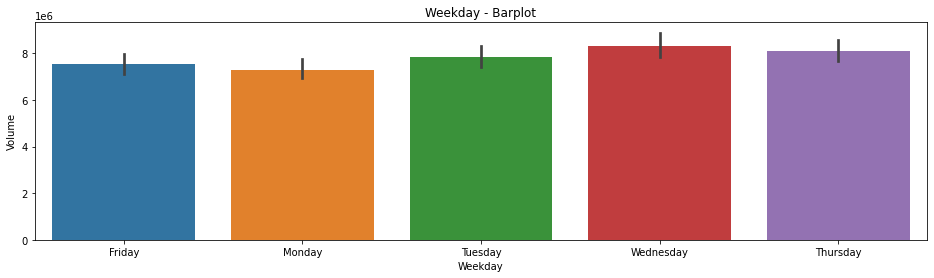

In [26]:
fig, axes = plt.subplots(1,1,squeeze=False)
fig.set_size_inches(16,4)
sns.barplot(data=stock_data, x='day_of_week', y=stock_data['Volume'],ax=axes[0,0])
axes[0,0].set_title("Weekday - Barplot")
axes[0,0].set_xlabel('Weekday')
axes[0,0].set_ylabel('Volume')

Text(0, 0.5, 'Volume')

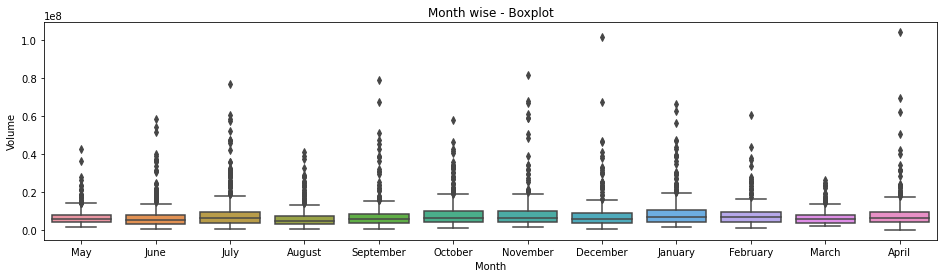

In [27]:
fig, ax = plt.subplots(figsize=(16,4))
sns.boxplot(data=stock_data, x='month', y=stock_data['Volume'], ax = ax)
ax.set_title("Month wise - Boxplot")
ax.set_xlabel('Month')
ax.set_ylabel('Volume')

# EDA OBSERVATION

<b>Observation from Time series plot: </b>

1. Plot 1 - Shows the overall trend for amazon Volume 
2. Plot 2 - Weekday-wise plot, shows the daily (monday-friday) trend-cycle of amazon Volume
3. plot 3 - Month-wise plot, shows the monthly trend

<b> Outliers: </b>
We do observe some outliers in the plot 3-boxplot. However, This may mean that there is a massive amount of volume on that particular period (Day/Week). Hence we will not do anything with the outliers

# Correlation between the 2 datasets

In [28]:
stock_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt', 'DailyDiff',
       'OpenApple', 'HighApple', 'LowApple', 'CloseApple', 'VolumeApple',
       'DailyDiffApple', 'month', 'weekday', 'day_of_week'],
      dtype='object')

In [29]:
stock_numeric_df = stock_data[["Open", "High", "Low", "Close", "Volume", 'DailyDiff',"OpenApple", "HighApple", "LowApple", "CloseApple", "VolumeApple", 'DailyDiffApple']] 
stock_numeric_df.corr().style.background_gradient(cmap='YlOrRd')

,Open,High,Low,Close,Volume,DailyDiff,OpenApple,HighApple,LowApple,CloseApple,VolumeApple,DailyDiffApple
Open,1.000000,0.999940,0.999916,0.999864,-0.299983,0.731973,0.917462,0.917141,0.918204,0.917745,-0.349828,0.642072
High,0.999940,1.000000,0.999902,0.999936,-0.297974,0.735590,0.917807,0.917516,0.918555,0.918128,-0.349321,0.643478
Low,0.999916,0.999902,1.000000,0.999939,-0.301425,0.726037,0.917340,0.917026,0.918149,0.917684,-0.350607,0.639138
Close,0.999864,0.999936,0.999939,1.000000,-0.299428,0.730651,0.917548,0.917259,0.918349,0.917931,-0.350063,0.640849
Volume,-0.299983,-0.297974,-0.301425,-0.299428,1.000000,-0.050758,-0.359773,-0.359677,-0.360076,-0.359795,0.169848,-0.252631
DailyDiff,0.731973,0.735590,0.726037,0.730651,-0.050758,1.000000,0.693354,0.694245,0.690997,0.692508,-0.193042,0.680372
OpenApple,0.917462,0.917807,0.917340,0.917548,-0.359773,0.693354,1.000000,0.999944,0.999925,0.999872,-0.314748,0.756502
HighApple,0.917141,0.917516,0.917026,0.917259,-0.359677,0.694245,0.999944,1.000000,0.999908,0.999940,-0.313268,0.760060
LowApple,0.918204,0.918555,0.918149,0.918349,-0.360076,0.690997,0.999925,0.999908,1.000000,0.999941,-0.317373,0.751185
CloseApple,0.917745,0.918128,0.917684,0.917931,-0.359795,0.692508,0.999872,0.999940,0.999941,1.000000,-0.315326,0.755536


### Observation:
weak: values < 0.25 </br>
moderate: 0.25 < values < 0.75 </br>
strong: values > 0.75 </br>


There is no (weak) correlation between the Volume and every other columns between Amazon and Apple stock.<br>

However there seem to be strong correlation in terms of their Open,High,Low,Close for all of them as the correlation values are at 0.9. <br>

Also for the exogenous variable (DailyDiff), there seem to be strong correlation with every other columns except for Volume . This even more so for the DailyDiff of amazon stock at around 0.7, than apple stock at around 0.6 

# 3) Amazon Volume Time Series

In [30]:
import numpy as np
from sklearn.model_selection import train_test_split

# define random state to make random processes reproducible
random_state = np.random.RandomState(0)

In [31]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Splitting the dataset

## Making the training dataset

In [32]:
#create the training DataFrame
training = pd.DataFrame(data[:'2017-08-09'])

In [33]:
training

,Open,High,Low,Close,Volume,OpenInt,DailyDiff
Date,,,,,,,
1997-05-16,1.97,1.980,1.71,1.73,14700000,0,0.270
1997-05-19,1.76,1.770,1.62,1.71,6106800,0,0.150
1997-05-20,1.73,1.750,1.64,1.64,5467200,0,0.110
1997-05-21,1.64,1.650,1.38,1.43,18853200,0,0.270
1997-05-22,1.44,1.450,1.31,1.40,11776800,0,0.140
...,...,...,...,...,...,...,...
2017-08-03,999.47,999.500,984.59,986.92,3253014,0,14.910
2017-08-04,989.68,991.672,982.00,987.41,2727226,0,9.672
2017-08-07,990.65,995.000,987.14,992.27,2670282,0,7.860


In [34]:
#set the training index to a type than object
training.index = training.index.astype('datetime64[ns]')

In [35]:
#Checking the index info of text
training.index

DatetimeIndex(['1997-05-16', '1997-05-19', '1997-05-20', '1997-05-21',
               '1997-05-22', '1997-05-23', '1997-05-27', '1997-05-28',
               '1997-05-29', '1997-05-30',
               ...
               '2017-07-27', '2017-07-28', '2017-07-31', '2017-08-01',
               '2017-08-02', '2017-08-03', '2017-08-04', '2017-08-07',
               '2017-08-08', '2017-08-09'],
              dtype='datetime64[ns]', name='Date', length=5087, freq=None)

In [36]:
#Checking how the first 50 rows look like BEFORE CHANGING FREQUENCY
training.head(50)

,Open,High,Low,Close,Volume,OpenInt,DailyDiff
Date,,,,,,,
1997-05-16,1.97,1.98,1.71,1.73,14700000,0,0.27
1997-05-19,1.76,1.77,1.62,1.71,6106800,0,0.15
1997-05-20,1.73,1.75,1.64,1.64,5467200,0,0.11
1997-05-21,1.64,1.65,1.38,1.43,18853200,0,0.27
1997-05-22,1.44,1.45,1.31,1.40,11776800,0,0.14
1997-05-23,1.41,1.52,1.33,1.50,15937200,0,0.19
1997-05-27,1.51,1.65,1.46,1.58,8697600,0,0.19
1997-05-28,1.62,1.64,1.53,1.53,4574400,0,0.11
1997-05-29,1.54,1.54,1.48,1.51,3472800,0,0.06


In [37]:
#Resample the data to match the frequency
training = training.resample('B').mean()

In [38]:
training.info

<bound method DataFrame.info of               Open     High     Low   Close      Volume  OpenInt  DailyDiff
Date                                                                       
1997-05-16    1.97    1.980    1.71    1.73  14700000.0      0.0      0.270
1997-05-19    1.76    1.770    1.62    1.71   6106800.0      0.0      0.150
1997-05-20    1.73    1.750    1.64    1.64   5467200.0      0.0      0.110
1997-05-21    1.64    1.650    1.38    1.43  18853200.0      0.0      0.270
1997-05-22    1.44    1.450    1.31    1.40  11776800.0      0.0      0.140
...            ...      ...     ...     ...         ...      ...        ...
2017-08-03  999.47  999.500  984.59  986.92   3253014.0      0.0     14.910
2017-08-04  989.68  991.672  982.00  987.41   2727226.0      0.0      9.672
2017-08-07  990.65  995.000  987.14  992.27   2670282.0      0.0      7.860
2017-08-08  994.35  996.280  985.79  989.84   2889515.0      0.0     10.490
2017-08-09  982.60  988.000  975.27  982.01   3568143.0 

In [39]:
#Setting the training index frequency to B
training.index = pd.date_range('1997-05-16','2017-08-09', freq = 'B')


In [40]:
training.index

DatetimeIndex(['1997-05-16', '1997-05-19', '1997-05-20', '1997-05-21',
               '1997-05-22', '1997-05-23', '1997-05-26', '1997-05-27',
               '1997-05-28', '1997-05-29',
               ...
               '2017-07-27', '2017-07-28', '2017-07-31', '2017-08-01',
               '2017-08-02', '2017-08-03', '2017-08-04', '2017-08-07',
               '2017-08-08', '2017-08-09'],
              dtype='datetime64[ns]', length=5279, freq='B')

In [41]:
training.isna().sum()

Open         192
High         192
Low          192
Close        192
Volume       192
OpenInt      192
DailyDiff    192
dtype: int64

In [42]:
#Checking how the first 50 rows look like AFTER CHANGING FREQUENCY
training.head(50)

,Open,High,Low,Close,Volume,OpenInt,DailyDiff
1997-05-16,1.97,1.98,1.71,1.73,14700000.0,0.0,0.27
1997-05-19,1.76,1.77,1.62,1.71,6106800.0,0.0,0.15
1997-05-20,1.73,1.75,1.64,1.64,5467200.0,0.0,0.11
1997-05-21,1.64,1.65,1.38,1.43,18853200.0,0.0,0.27
1997-05-22,1.44,1.45,1.31,1.40,11776800.0,0.0,0.14
1997-05-23,1.41,1.52,1.33,1.50,15937200.0,0.0,0.19
1997-05-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-05-27,1.51,1.65,1.46,1.58,8697600.0,0.0,0.19
1997-05-28,1.62,1.64,1.53,1.53,4574400.0,0.0,0.11
1997-05-29,1.54,1.54,1.48,1.51,3472800.0,0.0,0.06


In [43]:
#Set the Nan values to 0
training = training.fillna(0)

In [44]:
#Checking that the missing data has been set to 0
training.head(50)

,Open,High,Low,Close,Volume,OpenInt,DailyDiff
1997-05-16,1.97,1.98,1.71,1.73,14700000.0,0.0,0.27
1997-05-19,1.76,1.77,1.62,1.71,6106800.0,0.0,0.15
1997-05-20,1.73,1.75,1.64,1.64,5467200.0,0.0,0.11
1997-05-21,1.64,1.65,1.38,1.43,18853200.0,0.0,0.27
1997-05-22,1.44,1.45,1.31,1.40,11776800.0,0.0,0.14
1997-05-23,1.41,1.52,1.33,1.50,15937200.0,0.0,0.19
1997-05-26,0.00,0.00,0.00,0.00,0.0,0.0,0.00
1997-05-27,1.51,1.65,1.46,1.58,8697600.0,0.0,0.19
1997-05-28,1.62,1.64,1.53,1.53,4574400.0,0.0,0.11
1997-05-29,1.54,1.54,1.48,1.51,3472800.0,0.0,0.06


In [45]:
training['Volume']

1997-05-16    14700000.0
1997-05-19     6106800.0
1997-05-20     5467200.0
1997-05-21    18853200.0
1997-05-22    11776800.0
                 ...    
2017-08-03     3253014.0
2017-08-04     2727226.0
2017-08-07     2670282.0
2017-08-08     2889515.0
2017-08-09     3568143.0
Freq: B, Name: Volume, Length: 5279, dtype: float64

(array([ 7141,  7827,  9132, 10436, 11740, 12419]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

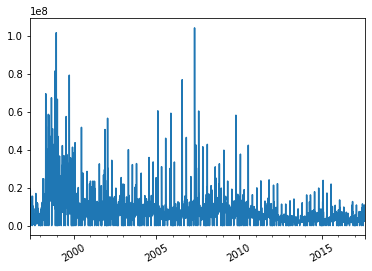

In [46]:
training['Volume'].plot()
plt.xticks(rotation = 30)

## Making the test dataset

In [47]:
#Set the DataFrame for test
test = pd.DataFrame(data['2017-08-10':])

In [48]:
test.index

Index(['2017-08-10', '2017-08-11', '2017-08-14', '2017-08-15', '2017-08-16',
       '2017-08-17', '2017-08-18', '2017-08-21', '2017-08-22', '2017-08-23',
       '2017-08-24', '2017-08-25', '2017-08-28', '2017-08-29', '2017-08-30',
       '2017-08-31', '2017-09-01', '2017-09-05', '2017-09-06', '2017-09-07',
       '2017-09-08', '2017-09-11', '2017-09-12', '2017-09-13', '2017-09-14',
       '2017-09-15', '2017-09-18', '2017-09-19', '2017-09-20', '2017-09-21',
       '2017-09-22', '2017-09-25', '2017-09-26', '2017-09-27', '2017-09-28',
       '2017-09-29', '2017-10-02', '2017-10-03', '2017-10-04', '2017-10-05',
       '2017-10-06', '2017-10-09', '2017-10-10', '2017-10-11', '2017-10-12',
       '2017-10-13', '2017-10-16', '2017-10-17', '2017-10-18', '2017-10-19',
       '2017-10-20', '2017-10-23', '2017-10-24', '2017-10-25', '2017-10-26',
       '2017-10-27', '2017-10-30', '2017-10-31', '2017-11-01', '2017-11-02',
       '2017-11-03', '2017-11-06', '2017-11-07', '2017-11-08', '2017-11-09',

In [49]:
print(len(test.index))

66


In [50]:
#set the datatype for test index and set the the frequency to B (business days)
test.index = test.index.astype('datetime64[ns]')
test= test.resample('B').mean()
test.index = pd.date_range('2017-08-10','2017-11-10', freq = 'B')

In [51]:
test.index

DatetimeIndex(['2017-08-10', '2017-08-11', '2017-08-14', '2017-08-15',
               '2017-08-16', '2017-08-17', '2017-08-18', '2017-08-21',
               '2017-08-22', '2017-08-23', '2017-08-24', '2017-08-25',
               '2017-08-28', '2017-08-29', '2017-08-30', '2017-08-31',
               '2017-09-01', '2017-09-04', '2017-09-05', '2017-09-06',
               '2017-09-07', '2017-09-08', '2017-09-11', '2017-09-12',
               '2017-09-13', '2017-09-14', '2017-09-15', '2017-09-18',
               '2017-09-19', '2017-09-20', '2017-09-21', '2017-09-22',
               '2017-09-25', '2017-09-26', '2017-09-27', '2017-09-28',
               '2017-09-29', '2017-10-02', '2017-10-03', '2017-10-04',
               '2017-10-05', '2017-10-06', '2017-10-09', '2017-10-10',
               '2017-10-11', '2017-10-12', '2017-10-13', '2017-10-16',
               '2017-10-17', '2017-10-18', '2017-10-19', '2017-10-20',
               '2017-10-23', '2017-10-24', '2017-10-25', '2017-10-26',
      

In [52]:
print(len(test.index))

67


In [53]:
test.isna().sum()

Open         1
High         1
Low          1
Close        1
Volume       1
OpenInt      1
DailyDiff    1
dtype: int64

In [54]:
test.head(20)

,Open,High,Low,Close,Volume,OpenInt,DailyDiff
2017-08-10,976.295,979.860,954.680,956.92,5603009.0,0.0,25.180
2017-08-11,960.000,970.390,951.380,967.99,3464884.0,0.0,19.010
2017-08-14,978.410,985.500,976.190,983.30,3168518.0,0.0,9.310
2017-08-15,988.900,991.740,982.000,982.74,2544672.0,0.0,9.740
2017-08-16,981.650,986.461,973.220,978.18,3125793.0,0.0,13.241
2017-08-17,977.840,977.840,960.320,960.57,3474358.0,0.0,17.520
2017-08-18,961.400,965.430,954.650,958.47,3276718.0,0.0,10.780
2017-08-21,957.570,961.200,945.460,953.29,3157620.0,0.0,15.740
2017-08-22,955.520,967.930,955.495,966.90,2745802.0,0.0,12.435
2017-08-23,959.380,962.000,954.200,958.00,2644883.0,0.0,7.800


In [55]:
test['Volume']

2017-08-10    5603009.0
2017-08-11    3464884.0
2017-08-14    3168518.0
2017-08-15    2544672.0
2017-08-16    3125793.0
                ...    
2017-11-06    3331738.0
2017-11-07    2684443.0
2017-11-08    2576010.0
2017-11-09    3729978.0
2017-11-10    2179181.0
Freq: B, Name: Volume, Length: 67, dtype: float64

In [56]:
test = test.fillna(0)

## Justification for resample

After changing the frequency to 'B', i have realised that there are additional dates (length value) added to the 'Date' column this can be due to the days being public holiday, where the stock market is close. However , the values of those dates are all Nan. 

However, i cannot delete them as later on in arima section, i would have a length value error. Hence i decide to set them as 0 as no sales of stock happened on that day.

# Section 1: STR - Classical STR decompostion 
Decompose into seasonal, trend and residual using a moving average. The decomposition is achieved using the following steps:
1. Isolate the trend-cycle component
2. Calculate the de-trended series
3. Estimate the seasonal component
4. Calculate the residual component 
Then we estimate a model of the trend, and combine this with the estimate of seasonality from step 3 to make predictions.

## Step 1: Isolate the trend

In [57]:
training['Week Trend'] = training['Volume'].rolling(5).mean() # a week
training['Month Trend'] = training['Volume'].rolling(20).mean() # a month
training['HalfYear Trend'] = training['Volume'].rolling(130).mean() # half a year
training['Year Trend'] = training['Volume'].rolling(260).mean() # a year

In [58]:
#Checking if the trend has frequency , index and length
training['Week Trend'].index

DatetimeIndex(['1997-05-16', '1997-05-19', '1997-05-20', '1997-05-21',
               '1997-05-22', '1997-05-23', '1997-05-26', '1997-05-27',
               '1997-05-28', '1997-05-29',
               ...
               '2017-07-27', '2017-07-28', '2017-07-31', '2017-08-01',
               '2017-08-02', '2017-08-03', '2017-08-04', '2017-08-07',
               '2017-08-08', '2017-08-09'],
              dtype='datetime64[ns]', length=5279, freq='B')

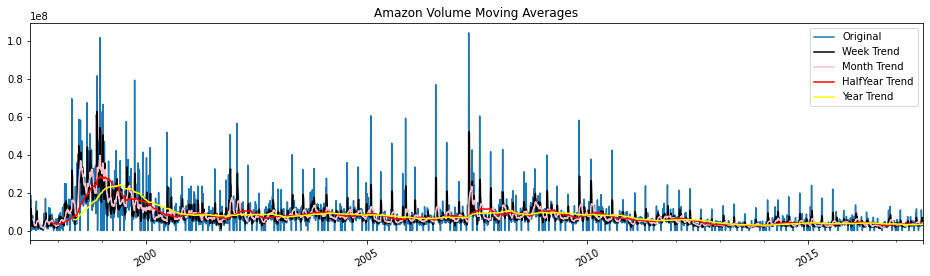

In [59]:
#plotting for isolation graph
fig, ax = plt.subplots(figsize = (16,4))
training['Volume'].plot(label='Original', ax=ax)
training['Week Trend'].plot(color='black', label='Week Trend', ax=ax)
training['Month Trend'].plot(color='pink', label='Month Trend', ax=ax)
training['HalfYear Trend'].plot(color='red', label='HalfYear Trend', ax=ax)
training['Year Trend'].plot(color='yellow', label='Year Trend', ax=ax)
plt.xticks(rotation = 30)
plt.title('Amazon Volume Moving Averages')
plt.legend()
plt.show()

<AxesSubplot:>

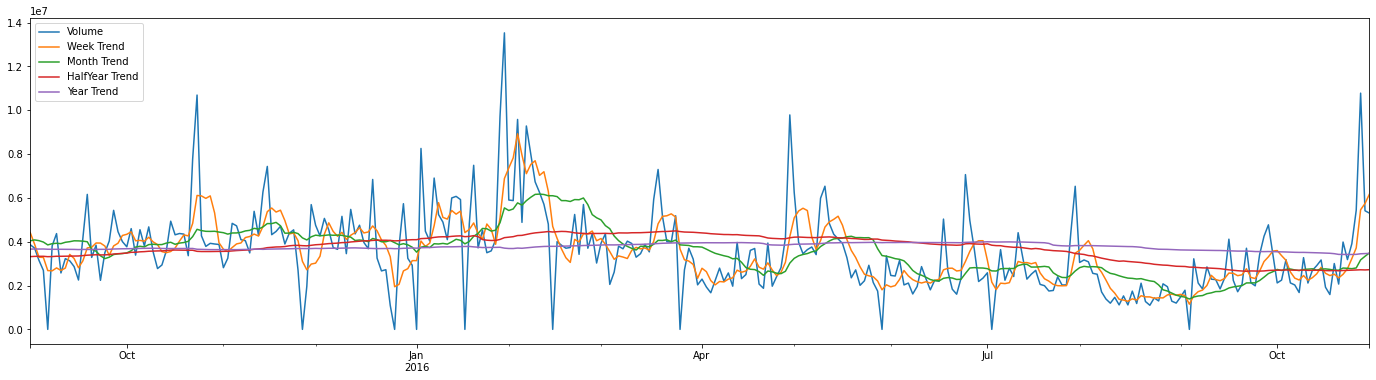

In [60]:
training['2015-09-01':'2016-11-01'][['Volume','Week Trend','Month Trend', 'HalfYear Trend', 'Year Trend']].plot(figsize=(24,6))

The Week Trend smoothing looks the most appropiate, and it shows a pattern, most similar when compared to the original dataset

## Step 2: De-trend the series

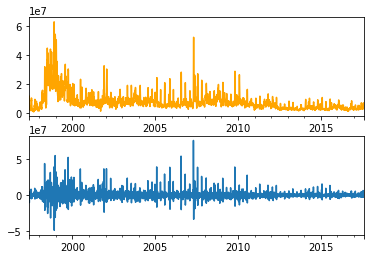

In [61]:
# De-trend data
training['De-trended'] = training['Volume'] - training['Week Trend']

# Plotting the graph for detrend and weekly 
fig, ax_detrended = plt.subplots(2)
training['Week Trend'].plot(color='orange', label='Week Trend', ax=ax_detrended[0])
training['De-trended'].plot(label='De-trended', ax=ax_detrended[1])
plt.show()

In [62]:
# Checking if the trend has frequency , index and length
training['De-trended'].index

DatetimeIndex(['1997-05-16', '1997-05-19', '1997-05-20', '1997-05-21',
               '1997-05-22', '1997-05-23', '1997-05-26', '1997-05-27',
               '1997-05-28', '1997-05-29',
               ...
               '2017-07-27', '2017-07-28', '2017-07-31', '2017-08-01',
               '2017-08-02', '2017-08-03', '2017-08-04', '2017-08-07',
               '2017-08-08', '2017-08-09'],
              dtype='datetime64[ns]', length=5279, freq='B')

<AxesSubplot:>

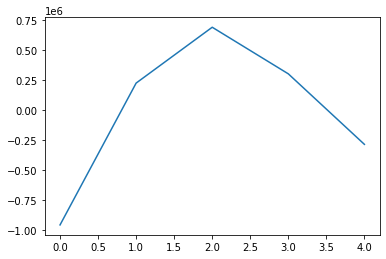

In [63]:
#Seeing the raw weekly means data
raw_weekday_means = training.groupby(training.index.weekday)['De-trended'].mean()
raw_weekday_means.plot()


<AxesSubplot:>

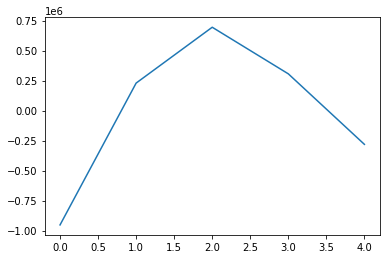

In [64]:
# Shift values so that seasonal components sum to zero
adjustment = raw_weekday_means.sum()/7
weekly_means = raw_weekday_means - adjustment
weekly_means.plot()

In [65]:
weekly_means.index

Int64Index([0, 1, 2, 3, 4], dtype='int64')

<AxesSubplot:>

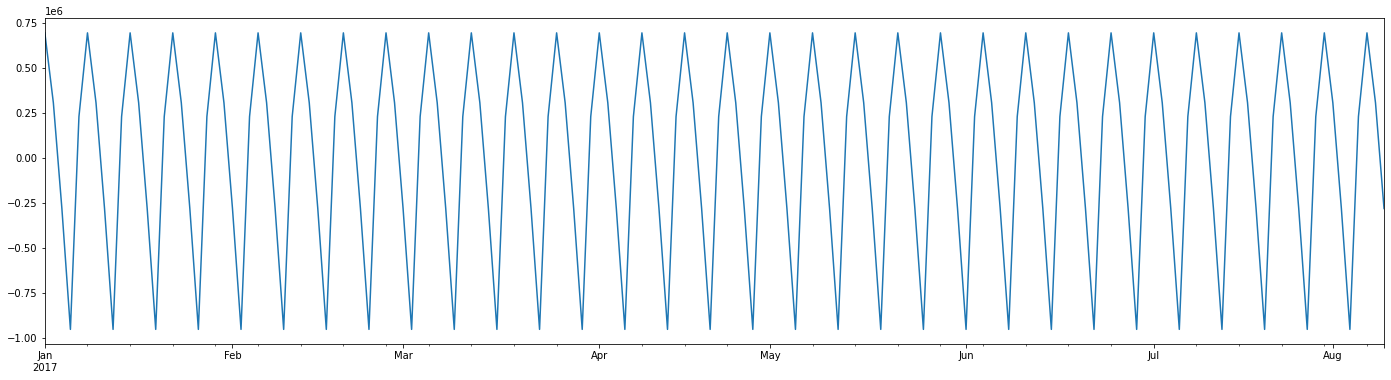

In [66]:
weekly_list = weekly_means.tolist()[5:] + weekly_means.tolist()[:5]
# tile the values into the dataframe so that the entire series is filled
seasonal = np.tile(weekly_list,int(np.floor(len(training)/5)))
seasonal = np.insert(seasonal,0,weekly_means[4])
seasonal = np.insert(seasonal,0,weekly_means[4])
seasonal = np.insert(seasonal,0,weekly_means[4])
seasonal = np.insert(seasonal,0,weekly_means[4])
training['Seasonal'] = seasonal
training['2017-01-01':'2017-10-10']['Seasonal'].plot(figsize=(24,6))

## Step 4: Calculate the residual

<AxesSubplot:>

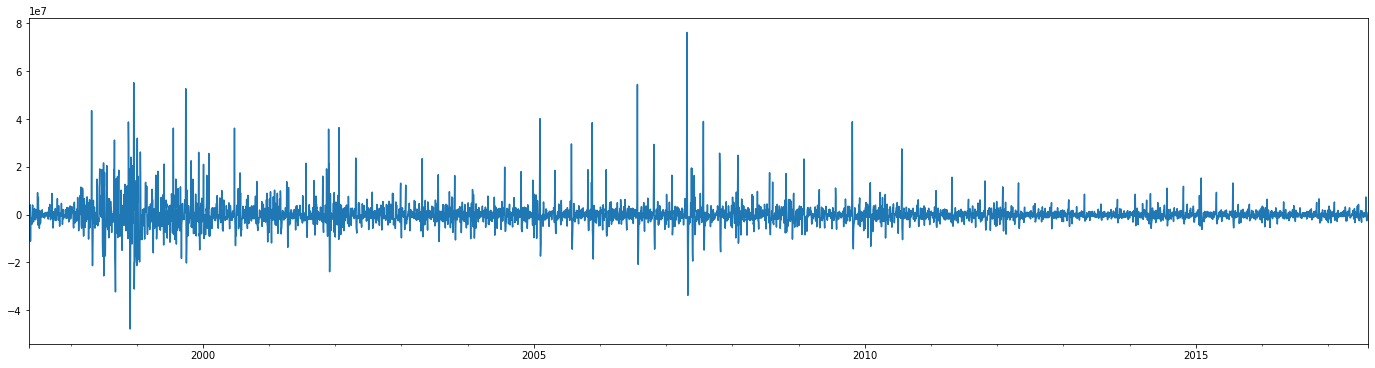

In [67]:
#Set the residual for training 
training['Residual'] = training['De-trended'] - training['Seasonal']
training['Residual'].plot(figsize=(24,6))

## Overview of STR

In [68]:
simple_pred = pd.DataFrame(index=training.index)

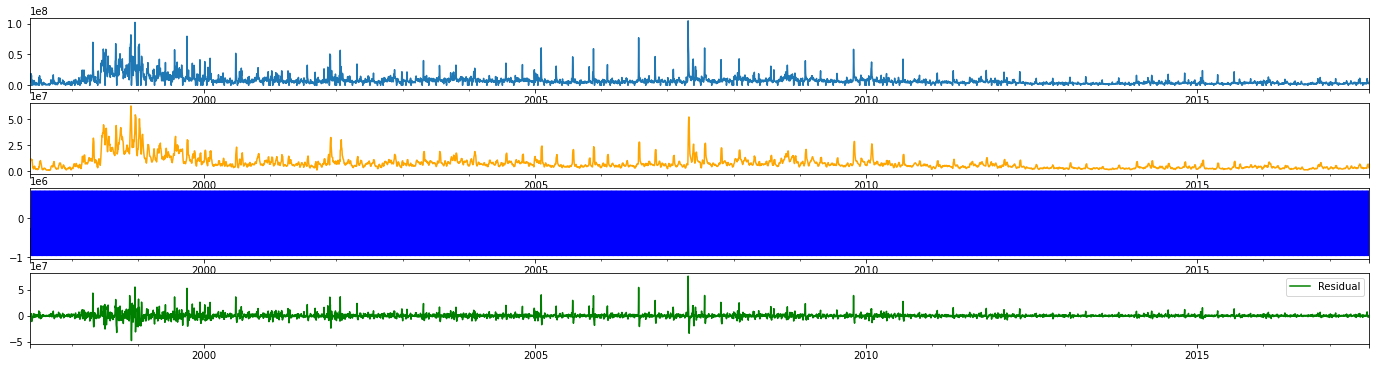

In [69]:
fig, ax_str = plt.subplots(4, figsize=(24,6))
training['Volume'].plot(label='Original', ax=ax_str[0])
training['Week Trend'].plot(color='orange', label='Week Trend', ax=ax_str[1])
training['Seasonal'].plot(color='blue', label='Seasonal', ax=ax_str[2])
training['Residual'].plot(color='green', label= 'Residual', ax=ax_str[3])
plt.legend()
plt.show()

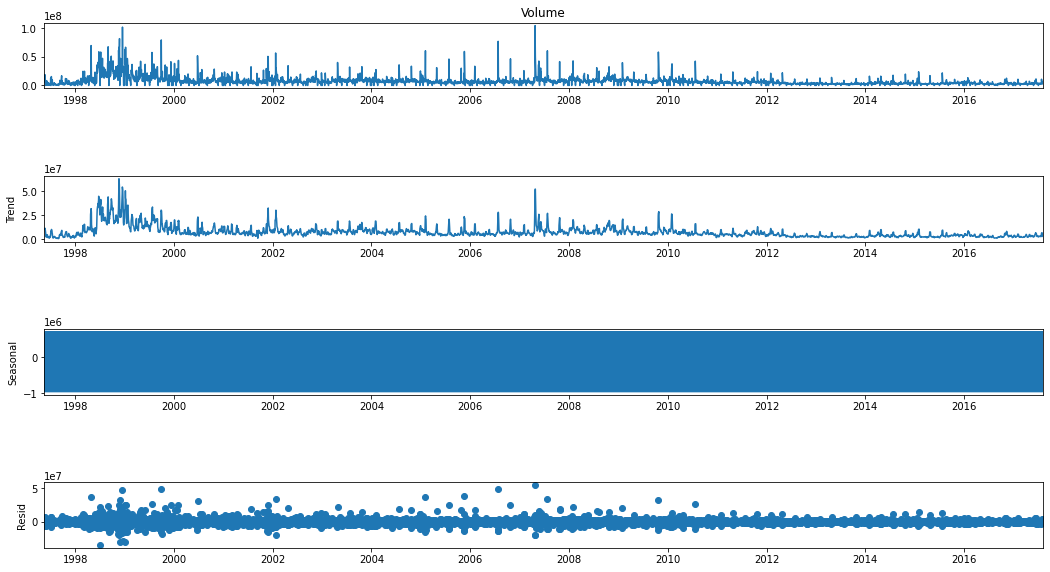

In [70]:
from statsmodels.tsa.seasonal import seasonal_decompose

str_res = seasonal_decompose(training['Volume'])
fig = str_res.plot()
fig.set_size_inches((16, 9))

# 4) Timeseries Models

## - Arima information
ARIMA -- AutoRegressive Integrated Moving Averages  -- models are a standard tool for modeling and forecasting (de-seasonalised) time series data.
Some theory of ARIMA models can be found in the course videos and in the FPP textbook. This section of the practical shows how to use the StatsModels software package to fit an ARIMA model, including how to chose the paramters:
- <i>p</i>: the AR (autoregressive) lag order
- <i>d</i>: the integration degree (or number of differences), and 
- <i>q</i>: the MA (moving averages) window length.

1. Check data for stationarity
 - Difference if required
 - Record the number of differences d
2. Fit a lower order model (e.g. p=1, q=1, with d as above)
3. Fit higher order models (typically increasing the AR lag parameter <i>p</i> first)
4. Compare the "goodness of fit" of the models, using the AIC and BIC,
 - If the goodness of fit metrics improve for the higher-order model, fit an even higher order model.
 - If they don’t improve by much, use the second last model you fit.
 - E.g. if moving from an ARIMA(2,1,1) model to an ARIMA(3,1,1) model shows little improvement in goodness of fit, use the ARIMA(2,1,1) model.

## 1) Check for stationarity

To fig an autoregressive model or an ARIMA model that contains an AR component, the data must be stationary. The criteria for stationarity is that the data is:
- roughly horizontal
- constant variance
- no patterns predictable in the long-term

We want to model the trend of the Volume data with an ARIMA model, so we have to first check that it is stationary by looking at its plot.

<AxesSubplot:>

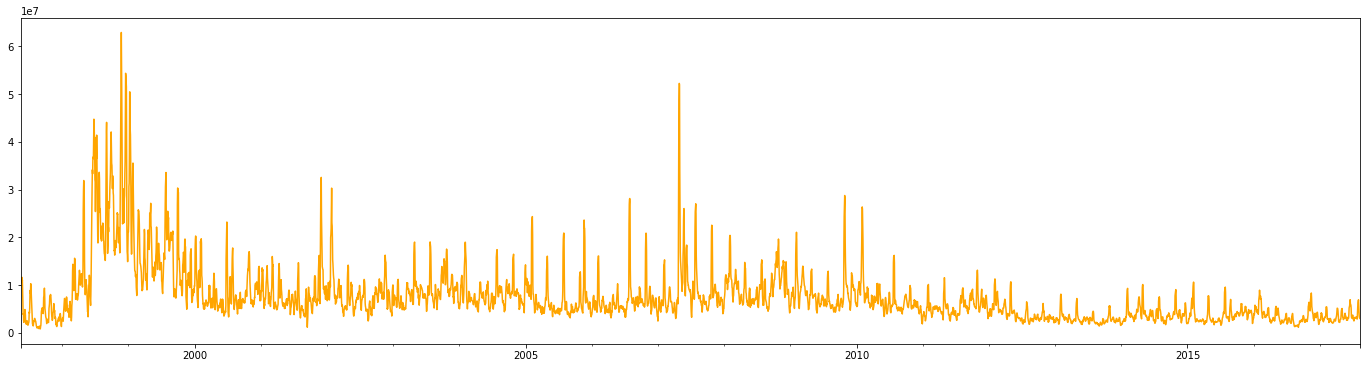

In [71]:
training['Week Trend'].plot(color='orange', figsize=(24,6))

<AxesSubplot:>

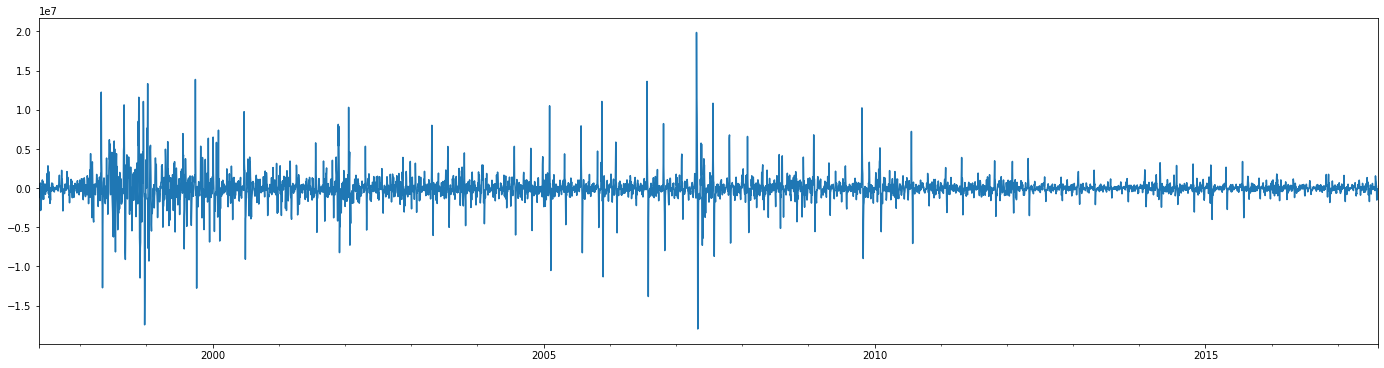

In [72]:
trend_d1 = training['Week Trend'].diff()
trend_d1.plot(figsize=(24,6))

<AxesSubplot:>

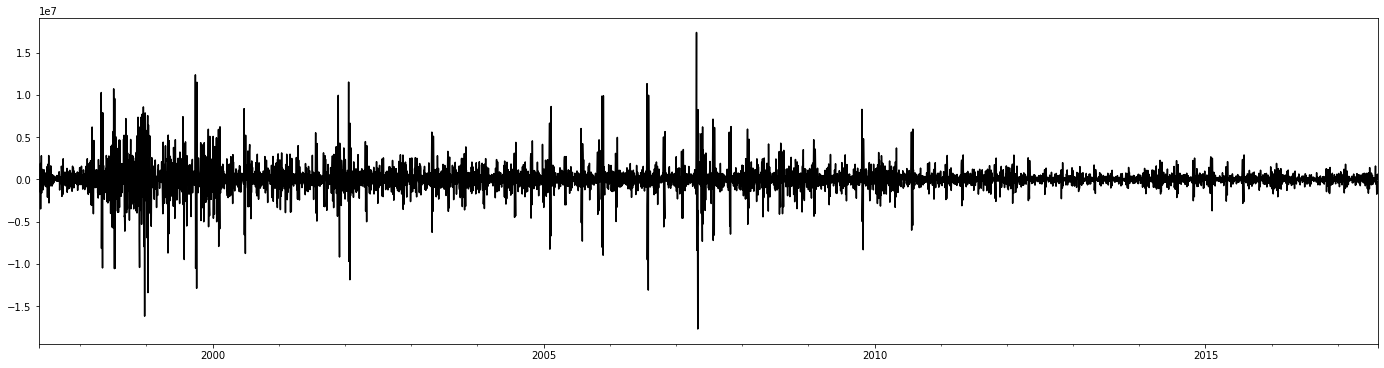

In [73]:
trend_d2 = trend_d1.diff()
trend_d2.plot(figsize=(24,6),color='black',)

This is much better. It is not perfect, but it is good enough for us to apply an ARIMA model to. 

<b>Keep note of <i>d</i> = 2.</b>

## 2) Fit a lower order model

In [74]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
import statsmodels.api as sm

### 2.1) Evidence of autocorrelation? 
Check if there is any evidence of autocorrelation in the data using the ACF and PCF plots (autocorrelation and partial autocorrelation).

In [75]:
#trim the nan's from the differenced trend** 
trend_d2 = trend_d2[26:]

### 2.1.1) plot for trend_d2

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


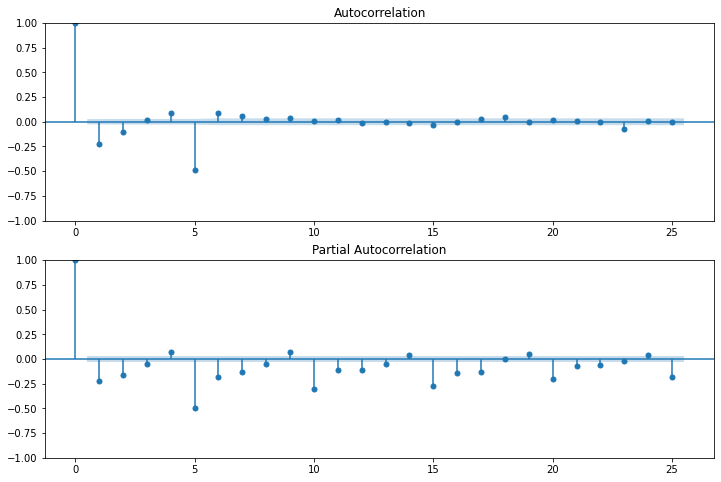

In [76]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(trend_d2, lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(trend_d2, lags=25, ax=ax2)

### 2.1.2) plot for trend_d1

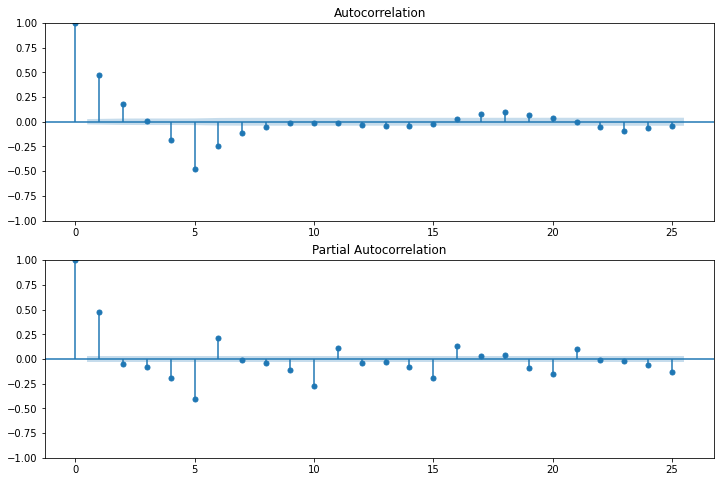

In [77]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(trend_d1[25:], lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(trend_d1[25:], lags=25, ax=ax2)

### 2.2.3) Fit your first ARIMA model

### Arima 1_2_0

In [78]:
arima_1_2_0 = ARIMA(training['Week Trend'], order=(1, 2, 0)).fit()
print(arima_1_2_0.summary())

                               SARIMAX Results                                
Dep. Variable:             Week Trend   No. Observations:                 5279
Model:                 ARIMA(1, 2, 0)   Log Likelihood              -82953.368
Date:                Sat, 05 Nov 2022   AIC                         165910.735
Time:                        13:05:35   BIC                         165923.877
Sample:                    05-16-1997   HQIC                        165915.329
                         - 08-09-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2286      0.005    -42.241      0.000      -0.239      -0.218
sigma2      2.669e+12   2.15e-16   1.24e+28      0.000    2.67e+12    2.67e+12
Ljung-Box (L1) (Q):                   7.54   Jarque-

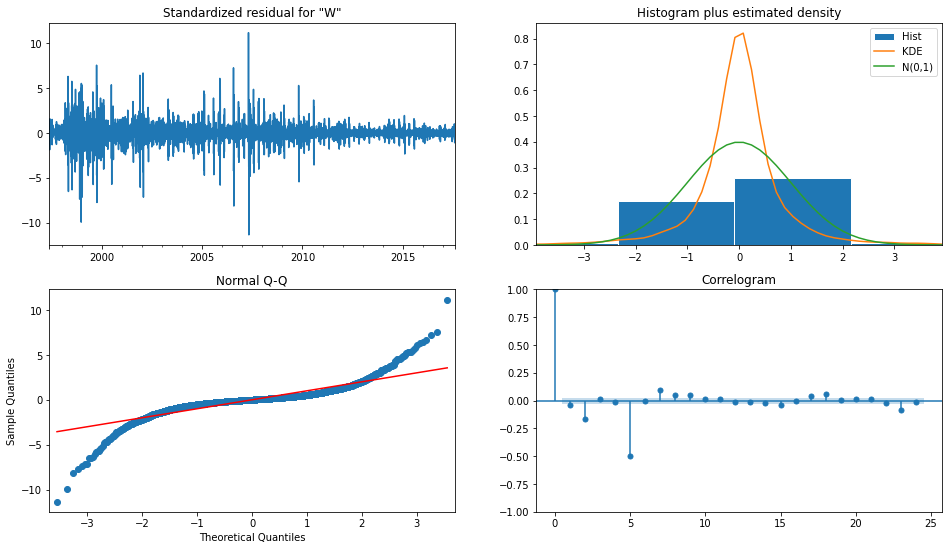

In [79]:
fig = plt.figure(figsize=(16, 9))
fig = arima_1_2_0.plot_diagnostics(fig=fig, lags=24)

### Arima 2_2_0

In [80]:
arima_2_2_0 = ARIMA(training['Week Trend'], order=(2, 2, 0)).fit()
print(arima_2_2_0.summary())

                               SARIMAX Results                                
Dep. Variable:             Week Trend   No. Observations:                 5279
Model:                 ARIMA(2, 2, 0)   Log Likelihood              -82880.944
Date:                Sat, 05 Nov 2022   AIC                         165767.889
Time:                        13:05:36   BIC                         165787.602
Sample:                    05-16-1997   HQIC                        165774.779
                         - 08-09-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2662      0.006    -46.711      0.000      -0.277      -0.255
ar.L2         -0.1646      0.007    -24.794      0.000      -0.178      -0.152
sigma2      2.596e+12   6.95e-16   3.74e+27      0.0

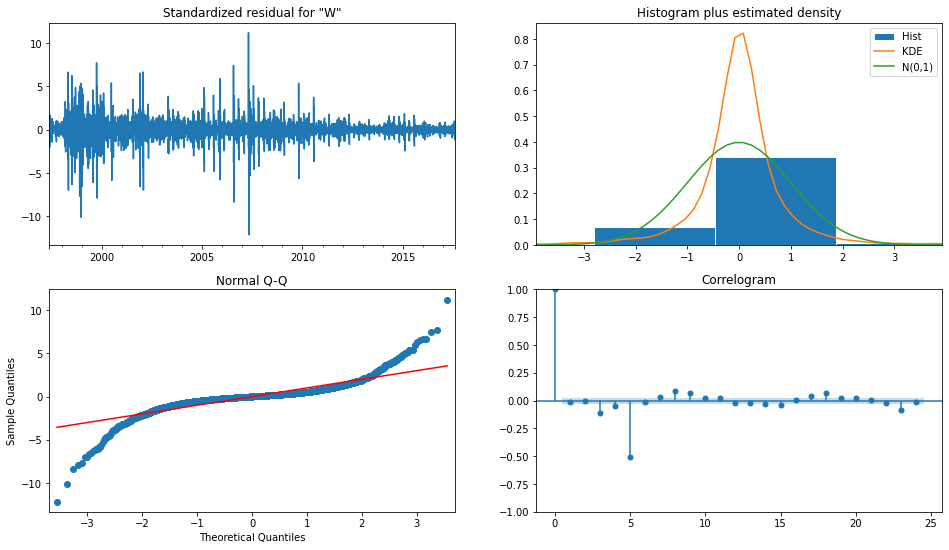

In [81]:
fig = plt.figure(figsize=(16, 9))
fig = arima_2_2_0.plot_diagnostics(fig=fig, lags=24)

## 3) Fit higher-order models

Now that the data has been made stationary, it can be modelled with an ARMA process. However, when using the software, it is best to use the full ARIMA model and set d=2 as determined above. This is a simple call to the ARIMA method in StatsModels, starting with p =1 and q=0.

## 3.1 Compare the goodness of fit, then continue

### Arima 2_2_1

In [82]:
arima_2_2_1 = ARIMA(training['Week Trend'], order=(2, 2, 1)).fit()
print(arima_2_2_1.summary())

                               SARIMAX Results                                
Dep. Variable:             Week Trend   No. Observations:                 5279
Model:                 ARIMA(2, 2, 1)   Log Likelihood              -82344.750
Date:                Sat, 05 Nov 2022   AIC                         164697.500
Time:                        13:05:40   BIC                         164723.784
Sample:                    05-16-1997   HQIC                        164706.687
                         - 08-09-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4950      0.009     55.957      0.000       0.478       0.512
ar.L2         -0.0486      0.009     -5.218      0.000      -0.067      -0.030
ma.L1         -0.9999      0.006   -157.832      0.0

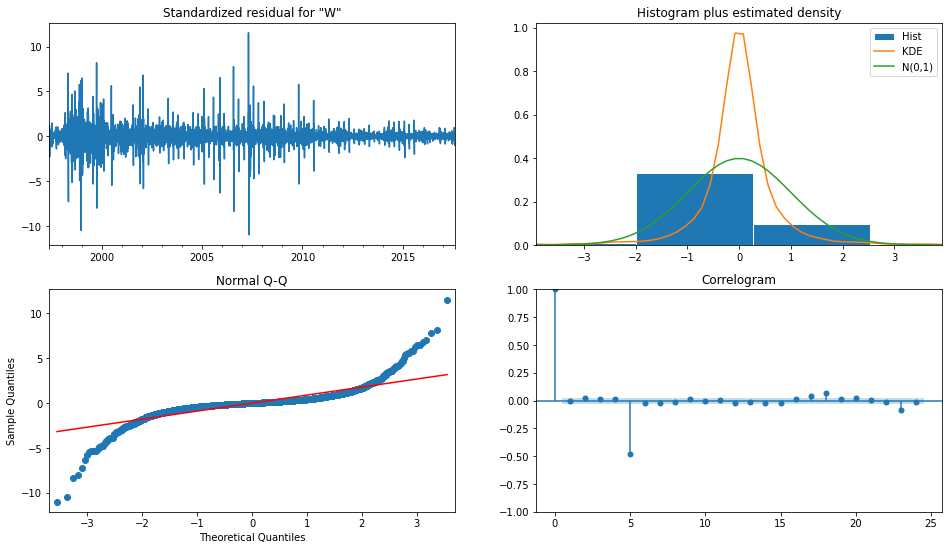

In [83]:
fig = plt.figure(figsize=(16, 9))
fig = arima_2_2_1.plot_diagnostics(fig=fig, lags=24)

## Observation :

Arima 1_2_0: AIC = 165910.735, BIC = 165923.877 <br>
Arima 2_2_0: AIC = 165767.889, BIC = 165787.602 <br>
Arima 2_2_1: AIC = 164697.500, BIC = 164723.784<br>

Looking at the summary outputs, the AIC for ARIMA(1,2,0) is 165910.735, while for ARIMA(2,2,0) it is  165767.889 and ARIMA(2,2,1) having AIC of 164697.500. A similar change is observed in the BIC. 



# 4) Forecasting with ARIMA

Note: I have slice the graph to training['2016-07-10':'2017-11-10']['Volume'] to be able to see the graph clearer 

In [84]:
test.index

DatetimeIndex(['2017-08-10', '2017-08-11', '2017-08-14', '2017-08-15',
               '2017-08-16', '2017-08-17', '2017-08-18', '2017-08-21',
               '2017-08-22', '2017-08-23', '2017-08-24', '2017-08-25',
               '2017-08-28', '2017-08-29', '2017-08-30', '2017-08-31',
               '2017-09-01', '2017-09-04', '2017-09-05', '2017-09-06',
               '2017-09-07', '2017-09-08', '2017-09-11', '2017-09-12',
               '2017-09-13', '2017-09-14', '2017-09-15', '2017-09-18',
               '2017-09-19', '2017-09-20', '2017-09-21', '2017-09-22',
               '2017-09-25', '2017-09-26', '2017-09-27', '2017-09-28',
               '2017-09-29', '2017-10-02', '2017-10-03', '2017-10-04',
               '2017-10-05', '2017-10-06', '2017-10-09', '2017-10-10',
               '2017-10-11', '2017-10-12', '2017-10-13', '2017-10-16',
               '2017-10-17', '2017-10-18', '2017-10-19', '2017-10-20',
               '2017-10-23', '2017-10-24', '2017-10-25', '2017-10-26',
      

In [85]:
arima_pred = pd.DataFrame(index=test.index)
arima_pred['Trend'] = arima_2_2_1.predict(start='2017-08-10', end='2017-11-10', dynamic=False)

In [86]:
arima_pred['Seasonal'] = ''
for t in range(len(arima_pred)):
    arima_pred['Seasonal'][t] = arima_pred['Trend'][t] + weekly_list[np.mod(t,5)]

/tmp/ipykernel_570517/1645659678.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arima_pred['Seasonal'][t] = arima_pred['Trend'][t] + weekly_list[np.mod(t,5)]


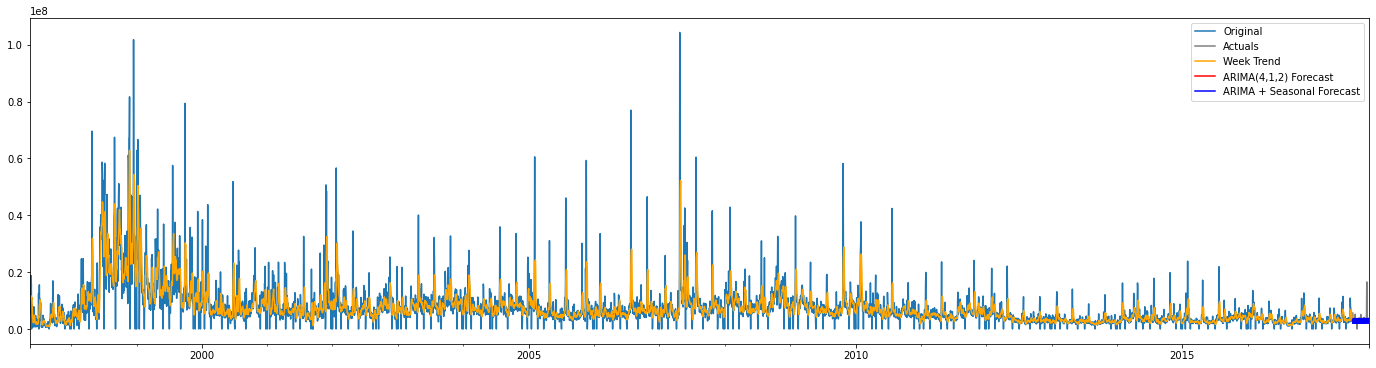

In [87]:
fig, ax_arma = plt.subplots(figsize=(24,6))
training['Volume'].plot(label='Original', ax=ax_arma)
test['Volume'].plot(color='grey', label='Actuals', ax=ax_arma)
training['Week Trend'].plot(color='orange', label='Week Trend', ax=ax_arma)
arima_pred['Trend'].plot(color='red', label='ARIMA(4,1,2) Forecast', ax=ax_arma)
arima_pred['Seasonal'].plot(color='blue', label='ARIMA + Seasonal Forecast', ax=ax_arma)
plt.legend()

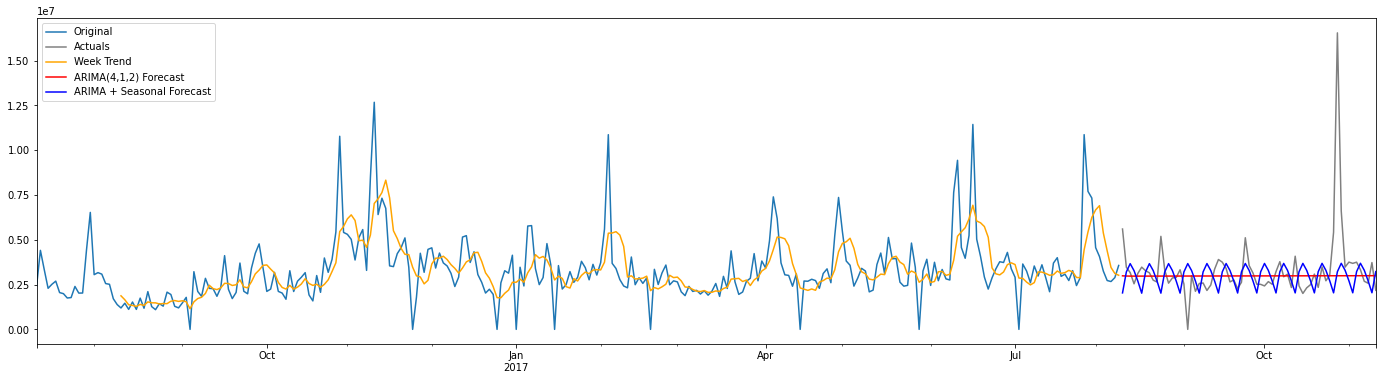

In [88]:
fig, ax_arma = plt.subplots(figsize=(24,6))
training['2016-07-10':'2017-11-10']['Volume'].plot(label='Original', ax=ax_arma)
test['Volume'].plot(color='grey', label='Actuals', ax=ax_arma)
training['2016-08-10':'2017-11-10']['Week Trend'].plot(color='orange', label='Week Trend', ax=ax_arma)
arima_pred['Trend'].plot(color='red', label='ARIMA(4,1,2) Forecast', ax=ax_arma)
arima_pred['Seasonal'].plot(color='blue', label='ARIMA + Seasonal Forecast', ax=ax_arma)
plt.legend()

# 5) Pure Forecast

## 5.1 Prepare the data

In [89]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/usr/local/lib/python3.9/dist-packages/pip/_vendor/rich/console.py", line 1752, in print
    extend(render(renderable, render_options))
  File "/usr/local/lib/python3.9/dist-packages/pip/_vendor/rich/console.py", line 1390, in render
    for render_output in iter_render:
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/usr/local/lib/python3.9/dist-packages/pip/_vendor/rich/segment.py", line 245, in split_lines
    for segment in segments:
  File "/usr/local/lib/python3.9/dist-packages/pip/_vendor/rich/console.py", line 1368, in render
    renderable = rich_cast(renderable)
  File 

In [90]:
from sklearn.preprocessing import MinMaxScaler

For 5a in the assignment, i am assuming that you meant to use the amazon volume (the code below) <br>
- Info on the assignment was alittle unclear in regards to which data do we use when concat hence i have use the trend that i have picked and use the test dataframe that i have split (back in task 3)

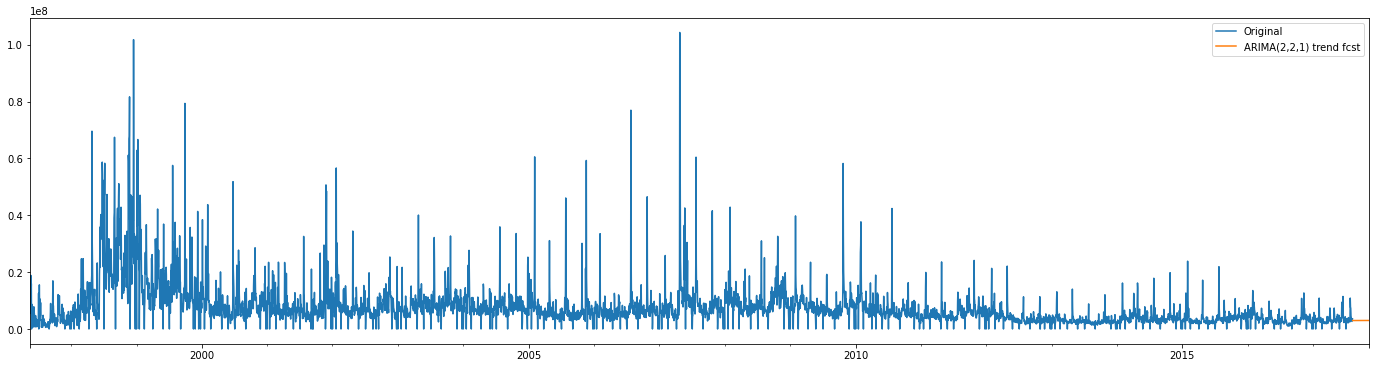

In [91]:
fig, ax_arima_fcst = plt.subplots(figsize=(24,6))
training['Volume'].plot(label='Original', ax=ax_arima_fcst)
arima_pred['Trend'].plot(label="ARIMA(2,2,1) trend fcst", ax=ax_arima_fcst)
plt.legend()


In [92]:
train = pd.concat([training['Week Trend'], 
                 training['Week Trend'].shift(), 
                 training['Week Trend'].shift(2),
                 training['Week Trend'].shift(3),
                 training['Week Trend'].shift(4)], 
                 axis=1
                 ).dropna()

In [93]:
test = pd.concat([test['Volume'], 
                 test['Volume'].shift(), 
                 test['Volume'].shift(2),
                 test['Volume'].shift(3),
                 test['Volume'].shift(4)], 
                 axis=1
                 ).dropna()

Keras requires training data inputs to be in the form of numpy arrays:

In [94]:
data_train = np.array(train)

In [95]:
data_test = np.array(test)

In [96]:
# Scale
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(data_train)
test_scaled = scaler.transform(data_test)

# training data
y_train = train_scaled[:,0]
X_train = train_scaled[:,1:]

# test data
y_test = test_scaled[:,0]
X_test = test_scaled[:,1:]

## 5.2 Configure the neural network

In [97]:
from tensorflow import keras

2022-11-05 13:05:46.132485: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-05 13:05:46.418795: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-05 13:05:46.418846: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-05 13:05:46.464690: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-05 13:05:47.559927: W tensorflow/stream_executor/platform/de

## Note: 

TensorFlow may have installation issue which will affect the codes below (like memory allocation , ect). If so, re-run the entire assignment again 

In [98]:
# Configure model
learning_rate = 0.001 # NN weight update rates

The next two functions configure two different feed-forward network examples. They use a mix of hidden layer sizes and activation functions (ReLU or tanh), but all begin with input_dim=4, which are the lagged values, and finish with a dense layer with one output, which is the predicted value.

We will use the following high-level Keras commands to configure a single-layer feed-forward network:

- keras.layers.Input()
- keras.layers.Dense()
- keras.layers.Output()
- keras.Model

Note the default values of optional arguments. You can adjust these by overriding the default values in a method call. You can also write your own functions implementing other architectures - deep networks (as in the videos), as well as recurrent architectures including elements such as LSTM or GRU cells. 

In [99]:
def slff_relu(input_dim,hidden_1_dim = 64):
    # Single-layer FF network with Rectified linear unit (relu) activation fxn
    inputs = keras.layers.Input(shape=(input_dim))
    hidden_layer_1 = keras.layers.Dense(hidden_1_dim, activation='relu')(inputs)
    outputs = keras.layers.Dense(1,activation='tanh')(hidden_layer_1)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

In [100]:
def deepff(input_dim,hidden_1_dim = 64, hidden_2_dim = 32, hidden_3_dim = 32):
    inputs = keras.layers.Input(shape=(input_dim))
    # your code here
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

In [101]:
## typeout block below to prevent retraining
input_dim = 4 # equal to the number of lagged variables
model = slff_relu(input_dim)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________


2022-11-05 13:05:48.501008: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-05 13:05:48.501127: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-05 13:05:48.501158: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (33285aa9.zones.eait.uq.edu.au): /proc/driver/nvidia/version does not exist
2022-11-05 13:05:48.501613: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [102]:
# Fit
model.fit(X_train, y_train, epochs=20, batch_size=20, shuffle=False)

Epoch 1/20


2022-11-05 13:05:48.630422: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 84336 exceeds 10% of free system memory.
2022-11-05 13:05:48.706573: W tensorflow/core/platform/profile_utils/cpu_utils.cc:118] Failed to find bogomips or clock in /proc/cpuinfo; cannot determine CPU frequency
2022-11-05 13:05:48.719183: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 42168 exceeds 10% of free system memory.
2022-11-05 13:05:48.719349: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 42168 exceeds 10% of free system memory.
2022-11-05 13:05:48.719843: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 42168 exceeds 10% of free system memory.


 65/264 [======>.......................] - ETA: 0s - loss: 0.0206 

2022-11-05 13:05:49.162158: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 42080 exceeds 10% of free system memory.


264/264 [==============================] - 1s 2ms/step - loss: 0.0059
Epoch 2/20
264/264 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 3/20
264/264 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 4/20
264/264 [==============================] - 0s 2ms/step - loss: 8.4918e-04
Epoch 5/20
264/264 [==============================] - 0s 2ms/step - loss: 7.8534e-04
Epoch 6/20
264/264 [==============================] - 0s 2ms/step - loss: 7.6077e-04
Epoch 7/20
264/264 [==============================] - 0s 2ms/step - loss: 7.3385e-04
Epoch 8/20
264/264 [==============================] - 0s 2ms/step - loss: 7.1370e-04
Epoch 9/20
264/264 [==============================] - 0s 1ms/step - loss: 6.9322e-04
Epoch 10/20
264/264 [==============================] - 0s 2ms/step - loss: 6.7895e-04
Epoch 11/20
264/264 [==============================] - 0s 2ms/step - loss: 6.6366e-04
Epoch 12/20
264/264 [==============================] - 0s 2ms/step - loss: 6.5361e-04


## 5.3 Predictions

In [103]:
# Predict
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 3ms/step


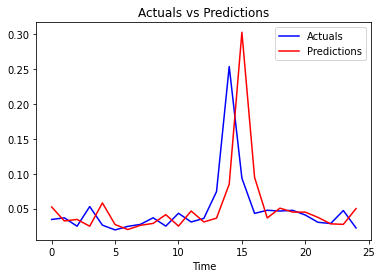

In [104]:
# Plot test data predictions
def plot_pred(y_test,y_pred,period=25):
    plt.figure()
    plt.plot(y_test[-period:], "b", label="Actuals")
    plt.plot(y_pred[-period:], "r", label="Predictions")
    plt.title("Actuals vs Predictions")
    plt.xlabel("Time")
    plt.legend()
    plt.show()

plot_pred(y_test,y_pred)

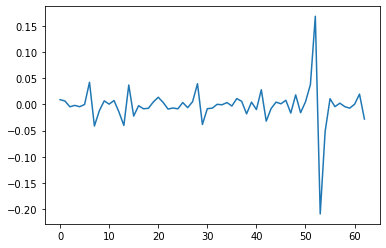

In [105]:
# Compute and plot the test data residuals (residual analysis)
residuals = np.squeeze(y_test) - np.squeeze(y_pred)
plt.plot(residuals)

## 5.4 Multistep point prediction

The multistep prediction loop include an optional residuals input, which is used later for bootstrapping. 

In [106]:
def multistep_prediction(H, model, X_pred,residuals=[]):
    # Initialise lists for storing multi-step predictions
    y_pred_multi = []
    X_pred_multi = []

    for t in range(H):
        # get next prediction
        X_pred = np.array(X_pred.reshape(1,len(X_pred)))
        new_y= float(model.predict(X_pred))
        # print("new_y")
        # print(new_y)
    
        # update 
        y_pred_multi.append(float(new_y))
        X_pred_multi.append(list(X_pred[0])) 
        # print("y_pred_multi")
        # print(y_pred_multi)
        # print("X_pred_multi")
        # print(X_pred_multi)
    
        # prepare net input with bootstrapped training residuals
        X_pred = X_pred_multi[t][:-1]
        if len(residuals) == 0:
            X_pred.insert(0,new_y)
        else:
            X_pred.insert(0,(new_y+np.random.choice(residuals)))
        X_pred = np.array(X_pred)
        # print("new X")
        # print(X_pred)
        
    return y_pred_multi, X_pred_multi

1/1 [==============================] - 0s 29ms/step


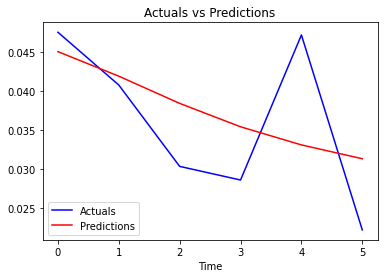

In [107]:
# Prediction horizon
H = 6

X_test_multi = X_test[-H:,:]
y_test_multi = y_test[-H:]
# y_pred_multi = model.predict(X_test_multi)    
# plot_pred(y_test_multi,y_pred_multi)

# Prepare first input to multistep prediction loop
X_pred = X_test_multi[0,:]

# Multistep prediction
y_pred_multi, X_pred_multi = multistep_prediction(H,model,X_pred)
plot_pred(y_test_multi, y_pred_multi)

# 5.5 Bootstrapping for interval predictions using neural networks

First we need the training data residuals.

In [108]:
residuals = np.squeeze(y_train) - np.squeeze(model.predict(X_train))

165/165 [==============================] - 0s 1ms/step


## 5.6 Bootstrapping errors to generated forcast distributions
Here we setup a bootstrap loop, to evaluate perturbed multi-step predictions of the timeseries.

In [109]:
# Bootstrap iterations
K = 100

# Prepare first input to multistep bootsrtap loop
X_pred = X_test_multi[0,:]
y_pred_bootstrap = []

# Use multistep prediction to generate bootstrap data, 
# List of training residuals to sample from passed in as fourth argument 

for k in range(K):
    y_pred_multi, X_pred_multi = multistep_prediction(H,model,X_pred,residuals)
    y_pred_bootstrap.append(y_pred_multi)
    # store y predictions

1/1 [==============================] - 0s 29ms/step


## 5.7 Visualising bootstrapped interval forcasts

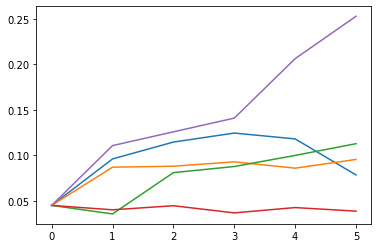

In [110]:
# Useful utility method for transposing lists of lists    
def transposed_2d_list(l):
    return [[row[i] for row in l] for i in range(len(l[0]))]    

plt.plot(transposed_2d_list(y_pred_bootstrap[-5:]))

plot some select percentiles, to illustrate the uncertainty in our forecasts with percentiles:

In [111]:
bootstrap_predictions = pd.DataFrame(index = test.index.values[-H:])

for pctl in range(0,101,10):
    bootstrap_predictions[str(pctl)] = np.percentile(y_pred_bootstrap,pctl,axis=0)

bootstrap_predictions.rename(columns={'50': "median"}, inplace=True)
bootstrap_predictions['actuals'] = y_test[-H:]

(array([12481, 12486]), [Text(0, 0, ''), Text(0, 0, '')])

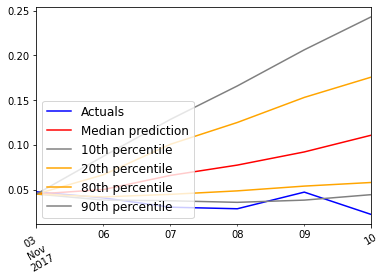

In [112]:
# plot some deciles
fig, ax_bootstrap_2 = plt.subplots()
bootstrap_predictions['actuals'].plot(color = 'blue', label='Actuals', axes=ax_bootstrap_2)
bootstrap_predictions['median'].plot(color = 'red',label = 'Median prediction', axes=ax_bootstrap_2 )
bootstrap_predictions['10'].plot(color = 'grey',label = '10th percentile', axes=ax_bootstrap_2 )
bootstrap_predictions['20'].plot(color = 'orange',label = '20th percentile', axes=ax_bootstrap_2 )
bootstrap_predictions['80'].plot(color = 'orange',label = '80th percentile', axes=ax_bootstrap_2 )
bootstrap_predictions['90'].plot(color = 'grey',label = '90th percentile', axes=ax_bootstrap_2 )
plt.legend(loc = 'lower left', fontsize = 12)
plt.xticks(rotation=30)

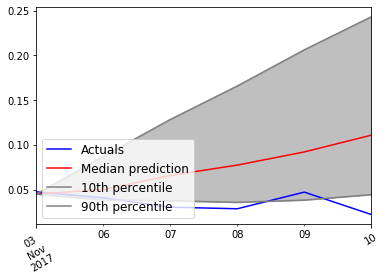

In [113]:
# plot interval with fill
fig, ax_bootstrap = plt.subplots()
bootstrap_predictions['actuals'].plot(color = 'blue', label='Actuals', axes=ax_bootstrap)
bootstrap_predictions['median'].plot(color = 'red',label = 'Median prediction', axes=ax_bootstrap )
bootstrap_predictions['10'].plot(color = 'grey', label = '10th percentile', axes=ax_bootstrap )
bootstrap_predictions['90'].plot(color = 'grey', label = '90th percentile', axes=ax_bootstrap )
plt.legend(loc = 'lower left', fontsize = 12)
plt.xticks(rotation=30)

x = data.index.values[-H:]
plt.fill_between(x, bootstrap_predictions['10'], bootstrap_predictions['90'], color='grey', alpha=0.5)

In [114]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

def rmse(y_true,y_pred):
    return mse(y_true,y_pred)**(0.5)

In [115]:
mae(y_test, y_pred)

0.018442872226216815

In [116]:
rmse(y_test, y_pred)

0.03833828680751043

In [117]:
mae(bootstrap_predictions['actuals'],bootstrap_predictions['median'])

0.03827102300762624

## 5.8) Adding seasonal to the model 

In [118]:
train2 = pd.concat([training['Seasonal'], 
                 training['Seasonal'].shift(), 
                 training['Seasonal'].shift(2),
                 training['Seasonal'].shift(3),
                 training['Seasonal'].shift(4)], 
                 axis=1
                 ).dropna()

In [119]:
data_train2 = np.array(train2)

In [120]:
data_test = np.array(test)

In [121]:
# Scale
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(data_train2)
test_scaled = scaler.transform(data_test)

# training data
y_train = train_scaled[:,0]
X_train = train_scaled[:,1:]

# test data
y_test = test_scaled[:,0]
X_test = test_scaled[:,1:]

In [122]:
model.fit(X_train, y_train, epochs=20, batch_size=20, shuffle=False)

Epoch 1/20
264/264 [==============================] - 0s 1ms/step - loss: 0.0069
Epoch 2/20
264/264 [==============================] - 0s 2ms/step - loss: 1.9649e-04
Epoch 3/20
264/264 [==============================] - 0s 2ms/step - loss: 1.6435e-04
Epoch 4/20
264/264 [==============================] - 0s 2ms/step - loss: 1.5185e-04
Epoch 5/20
264/264 [==============================] - 0s 2ms/step - loss: 1.4771e-04
Epoch 6/20
264/264 [==============================] - 0s 2ms/step - loss: 1.4245e-04
Epoch 7/20
264/264 [==============================] - 0s 2ms/step - loss: 1.4127e-04
Epoch 8/20
264/264 [==============================] - 0s 2ms/step - loss: 1.3696e-04
Epoch 9/20
264/264 [==============================] - 0s 1ms/step - loss: 1.3475e-04
Epoch 10/20
264/264 [==============================] - 0s 2ms/step - loss: 1.3204e-04
Epoch 11/20
264/264 [==============================] - 0s 1ms/step - loss: 1.2895e-04
Epoch 12/20
264/264 [==============================] - 0s 1ms/step 

In [123]:
# Predict
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 3ms/step


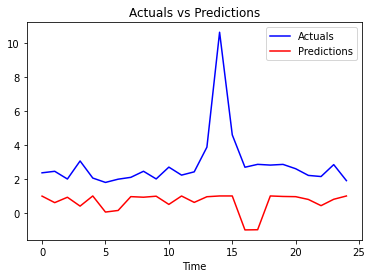

In [124]:
# Plot test data predictions
def plot_pred(y_test,y_pred,period=25):
    plt.figure()
    plt.plot(y_test[-period:], "b", label="Actuals")
    plt.plot(y_pred[-period:], "r", label="Predictions")
    plt.title("Actuals vs Predictions")
    plt.xlabel("Time")
    plt.legend()
    plt.show()

plot_pred(y_test,y_pred)

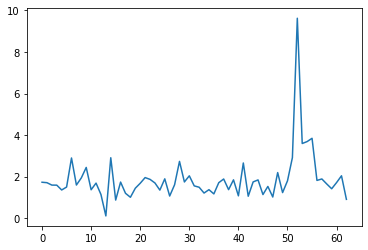

In [125]:
# Compute and plot the test data residuals (residual analysis)
residuals = np.squeeze(y_test) - np.squeeze(y_pred)
plt.plot(residuals)

## 5.10) Multistep point prediction

In [126]:
def multistep_prediction(H, model, X_pred,residuals=[]):
    # Initialise lists for storing multi-step predictions
    y_pred_multi = []
    X_pred_multi = []

    for t in range(H):
        # get next prediction
        X_pred = np.array(X_pred.reshape(1,len(X_pred)))
        new_y= float(model.predict(X_pred))
        # print("new_y")
        # print(new_y)
    
        # update 
        y_pred_multi.append(float(new_y))
        X_pred_multi.append(list(X_pred[0])) 
        # print("y_pred_multi")
        # print(y_pred_multi)
        # print("X_pred_multi")
        # print(X_pred_multi)
    
        # prepare net input with bootstrapped training residuals
        X_pred = X_pred_multi[t][:-1]
        if len(residuals) == 0:
            X_pred.insert(0,new_y)
        else:
            X_pred.insert(0,(new_y+np.random.choice(residuals)))
        X_pred = np.array(X_pred)
        # print("new X")
        # print(X_pred)
        
    return y_pred_multi, X_pred_multi

1/1 [==============================] - 0s 27ms/step


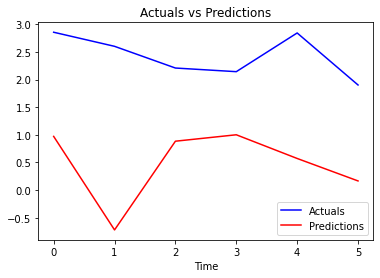

In [127]:
# Prediction horizon
H = 6

X_test_multi = X_test[-H:,:]
y_test_multi = y_test[-H:]
# y_pred_multi = model.predict(X_test_multi)    
# plot_pred(y_test_multi,y_pred_multi)

# Prepare first input to multistep prediction loop
X_pred = X_test_multi[0,:]

# Multistep prediction
y_pred_multi, X_pred_multi = multistep_prediction(H,model,X_pred)
plot_pred(y_test_multi, y_pred_multi)

## 5.11 Bootstrapping for interval predictions using neural networks

In [128]:
residuals = np.squeeze(y_train) - np.squeeze(model.predict(X_train))

165/165 [==============================] - 0s 1ms/step


## 5.12 Bootstrapping errors to generated forcast distributions

In [129]:
# Bootstrap iterations
K = 100

# Prepare first input to multistep bootsrtap loop
X_pred = X_test_multi[0,:]
y_pred_bootstrap = []

# Use multistep prediction to generate bootstrap data, 
# List of training residuals to sample from passed in as fourth argument 

for k in range(K):
    y_pred_multi, X_pred_multi = multistep_prediction(H,model,X_pred,residuals)
    y_pred_bootstrap.append(y_pred_multi)
    # store y predictions

1/1 [==============================] - 0s 31ms/step


## 5.13 Visualising bootstrapped interval forcasts

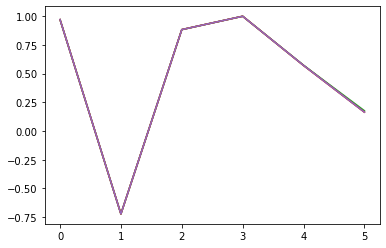

In [130]:
# Useful utility method for transposing lists of lists    
def transposed_2d_list(l):
    return [[row[i] for row in l] for i in range(len(l[0]))]    

plt.plot(transposed_2d_list(y_pred_bootstrap[-5:]))

In [131]:
bootstrap_predictions = pd.DataFrame(index = test.index.values[-H:])

for pctl in range(0,101,10):
    bootstrap_predictions[str(pctl)] = np.percentile(y_pred_bootstrap,pctl,axis=0)

bootstrap_predictions.rename(columns={'50': "median"}, inplace=True)
bootstrap_predictions['actuals'] = y_test[-H:]

(array([12481, 12486]), [Text(0, 0, ''), Text(0, 0, '')])

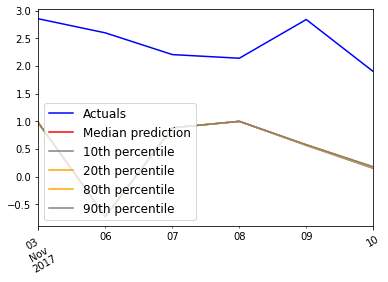

In [132]:
# plot some deciles
fig, ax_bootstrap_2 = plt.subplots()
bootstrap_predictions['actuals'].plot(color = 'blue', label='Actuals', axes=ax_bootstrap_2)
bootstrap_predictions['median'].plot(color = 'red',label = 'Median prediction', axes=ax_bootstrap_2 )
bootstrap_predictions['10'].plot(color = 'grey',label = '10th percentile', axes=ax_bootstrap_2 )
bootstrap_predictions['20'].plot(color = 'orange',label = '20th percentile', axes=ax_bootstrap_2 )
bootstrap_predictions['80'].plot(color = 'orange',label = '80th percentile', axes=ax_bootstrap_2 )
bootstrap_predictions['90'].plot(color = 'grey',label = '90th percentile', axes=ax_bootstrap_2 )
plt.legend(loc = 'lower left', fontsize = 12)
plt.xticks(rotation=30)

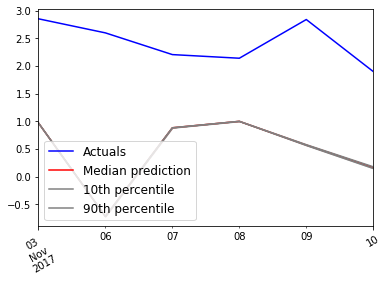

In [133]:
# plot interval with fill
fig, ax_bootstrap = plt.subplots()
bootstrap_predictions['actuals'].plot(color = 'blue', label='Actuals', axes=ax_bootstrap)
bootstrap_predictions['median'].plot(color = 'red',label = 'Median prediction', axes=ax_bootstrap )
bootstrap_predictions['10'].plot(color = 'grey', label = '10th percentile', axes=ax_bootstrap )
bootstrap_predictions['90'].plot(color = 'grey', label = '90th percentile', axes=ax_bootstrap )
plt.legend(loc = 'lower left', fontsize = 12)
plt.xticks(rotation=30)

x = data.index.values[-H:]
plt.fill_between(x, bootstrap_predictions['10'], bootstrap_predictions['90'], color='grey', alpha=0.5)

In [134]:
mae(y_test, y_pred)

1.861447377614834

In [135]:
rmse(y_test, y_pred)

2.2106046124796155

In [136]:
mae(bootstrap_predictions['actuals'],bootstrap_predictions['median'])

1.9469284544884558